In [1]:
import pandas as pd
import os
import numpy as np

from settings import TIME_RESULTS_PATH, TIME_LIMIT

In [2]:
results = pd.read_csv(TIME_RESULTS_PATH, index_col=0)
print("results", results.shape)
results.head()

results (11, 13)


,simulated_gm,simulated_InterSIM,simulated_netMUG,nutrimouse_genotype,nutrimouse_diet,bbcsport,buaa,metabric,digits,bdgp,tcga,caltech101,nuswide
Concat,0.020937,0.708584,0.958623,0.009495,0.011490,0.615496,0.305074,2.049203,1.042008,1.386216,1.822453,26.032111,10.992597
NMFC,0.007160,0.100091,0.469670,0.011918,0.010763,0.384972,0.089377,1.584606,0.505531,0.581798,3.354856,55.975224,18.057429
MVSpectralClustering,0.202724,5.404086,8.444749,0.196069,0.129316,0.464554,0.231217,20.060005,59.064082,25.078926,65.652452,5110.285582,NaN
MVCoRegSpectralClustering,0.110259,0.561998,3.278590,0.103106,0.136843,0.464830,0.145448,11.874035,13.414390,13.489572,33.783051,2289.544764,NaN
GroupPCA,0.009973,0.162918,0.335689,0.107292,0.105674,0.364418,0.106394,1.336521,1.034737,1.087339,1.359900,5.737082,3.183031


Iteration 1.12 days
Limited iteration 0.06 days
Total time        5605.763271
Estimated time     303.870801
dtype: float64


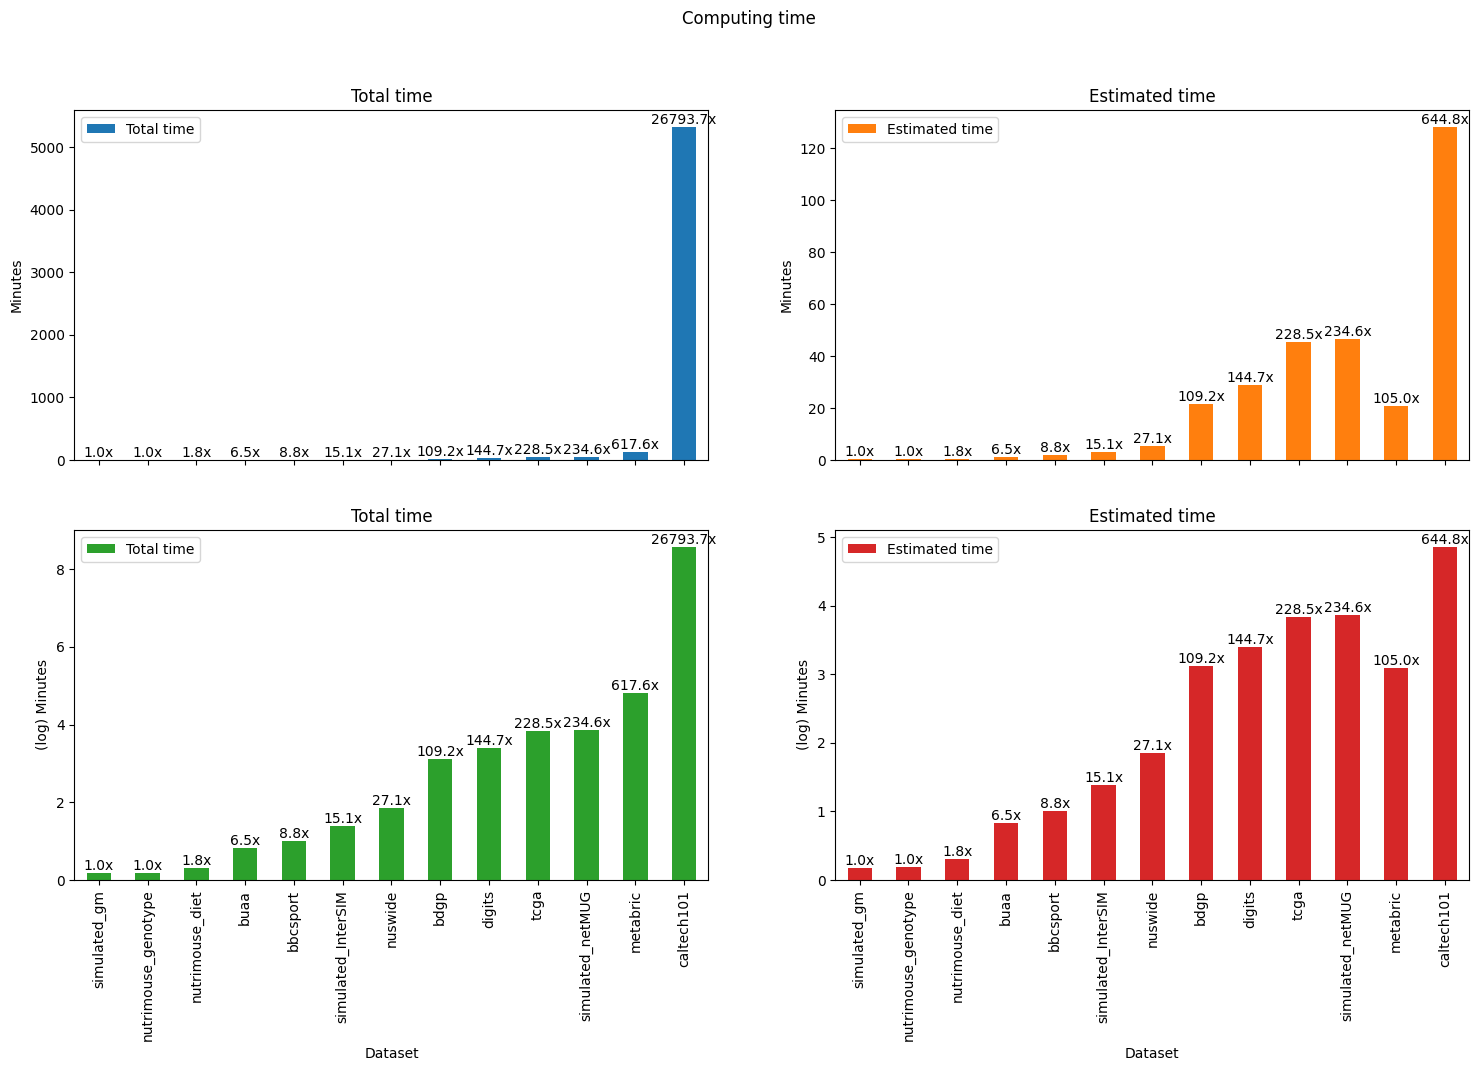

In [3]:
TIME_LIMIT = 0.4
time_limit_seconds = TIME_LIMIT * 3600

N_MISSING_PERCENTAGE = 10
N_MISSING_PATTERNS = 5
N_IMPUTING_PATTERNS = 2
N_PERMUTATIONS = 50

estimated_time = results[results < time_limit_seconds]

print("Iteration", round(results.div(3600).div(24).sum().sum(), 2), "days")
print("Limited iteration", round(estimated_time.div(3600).div(24).sum().sum(), 2), "days")
time = pd.DataFrame([(results * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum(),
                     (estimated_time * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum()],
                    index= ["Total time", "Estimated time"]).T
time = time.div(3600).div(24).sort_values("Total time")
print(time.sum(0))
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Dataset", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

In [4]:
# TIME_LIMIT = 0.5
# time_limit_seconds = TIME_LIMIT * 3600

# N_MISSING_PERCENTAGE = 10
# N_MISSING_PATTERNS = 5
# N_IMPUTING_PATTERNS = 2
# N_PERMUTATIONS = 50

# estimated_time = results[results < time_limit_seconds]

# print("Iteration", round(results.div(3600).div(24).sum().sum(), 2), "days")
# print("Limited iteration", round(estimated_time.div(3600).div(24).sum().sum(), 2), "days")
# time = pd.DataFrame([(results * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum(),
#                      (estimated_time * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum()],
#                     index= ["Total time", "Estimated time"]).T
# time = time.div(3600).div(24).sort_values("Total time")
# print(time.sum(0))
# labels = time / time.min(0)
# labels = labels.round(1).astype(str) + "x"
# axs = time.plot.bar(title= "Computing time", xlabel= "Dataset", ylabel= "Minutes", subplots= True, layout= (1,2), figsize= (18,4))
# for idx, ax in enumerate(axs[0]):
#     _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx])

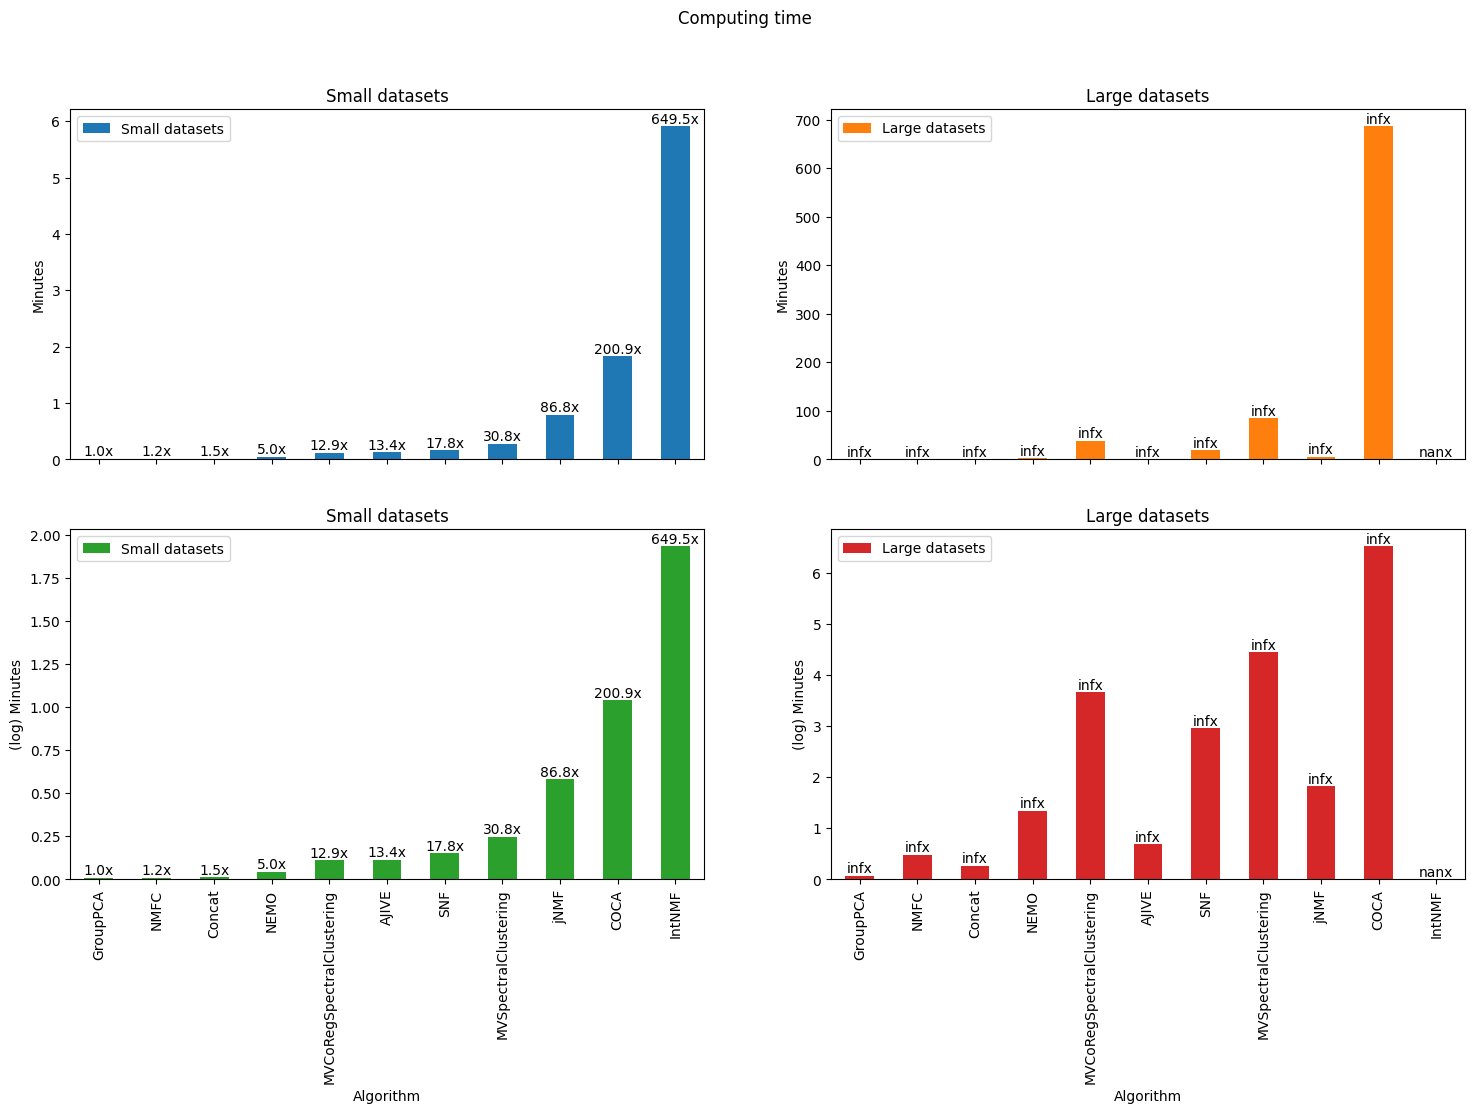

In [5]:
large_datasets = ["caltech101", "nuswide"]
time = pd.DataFrame([results.drop(columns=large_datasets).mean(1), results[large_datasets].mean(1)], index= ["Small datasets", "Large datasets"]).T
time = time.div(60).sort_values("Small datasets")
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

In [6]:
# large_datasets = ["caltech101", "nuswide"]
# time = pd.DataFrame([results.drop(columns=large_datasets).mean(1), results[large_datasets].mean(1)], index= ["Small datasets", "Large datasets"]).T
# time = time.div(60).sort_values("Small datasets")
# labels = time / time.min(0)
# labels = labels.round(1).astype(str) + "x"
# axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes", subplots= True, layout= (1,2), figsize= (18,4))
# for idx, ax in enumerate(axs[0]):
#     _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx])

In [7]:
# time = results.div(60).mean(1).sort_values()
# ax = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes")
# labels = time / time.min()
# labels = labels.round(1).astype(str) + "x"
# _ = ax.bar_label(ax.containers[0], labels= labels)

In [8]:
results.div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

,simulated_gm,simulated_InterSIM,simulated_netMUG,nutrimouse_genotype,nutrimouse_diet,bbcsport,buaa,metabric,digits,bdgp,tcga,caltech101,nuswide
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0
NMFC,0,0,0,0,0,0,0,0,0,0,0,1,0
MVSpectralClustering,0,0,0,0,0,0,0,0,1,0,1,85,nan
MVCoRegSpectralClustering,0,0,0,0,0,0,0,0,0,0,1,38,nan
GroupPCA,0,0,0,0,0,0,0,0,0,0,0,0,0
AJIVE,nan,0,0,0,0,0,0,0,0,0,0,1,1
SNF,0,0,0,0,0,0,0,0,0,0,1,18,nan
IntNMF,0,0,11,0,0,nan,0,29,nan,nan,nan,nan,0
COCA,0,0,0,0,0,0,0,3,6,4,7,1374,0
jNMF,0,0,1,0,0,0,0,2,0,1,3,10,0
